In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sales1 Data

In [2]:
#Read the sales1 data
sales_data_1=pd.read_csv("sales_data_1.csv")
sales_data_1

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


### 1. What is their overall gross margin for their business?

In [3]:
overall_gross_margin = ((sales_data_1['Selling price'] - sales_data_1['Buying price']).sum() / sales_data_1['Selling price'].sum()) * 100
print("Overall Gross Margin for their Business",overall_gross_margin)

Overall Gross Margin for their Business 23.33236050738993


### 2. Which vendor is the most profitable?

In [4]:
vendor_profit = sales_data_1.groupby('Firm bought from')['Selling price'].sum() - sales_data_1.groupby('Firm bought from')['Buying price'].sum()
most_profitable_vendor = vendor_profit.idxmax()
print("Most profitable Vendor:",most_profitable_vendor)

Most profitable Vendor: Vendor7


### 3. Which customer is the least profitable?

In [5]:
customer_profit = sales_data_1.groupby('Customer')['Selling price'].sum() - sales_data_1.groupby('Customer')['Buying price'].sum()
least_profitable_customer = customer_profit.idxmin()
print("Least Profitable Customer:",least_profitable_customer)

Least Profitable Customer: Customer9


### 4. Which day of the week was most profitable for them?

In [6]:
# Extract the day of the week from the date attribute
sales_data_1['Date'] = pd.to_datetime(sales_data_1['Date'])
sales_data_1['day_of_week'] = sales_data_1['Date'].dt.day_name()

# Find the most and least profitable days of the week
profit_by_day = sales_data_1.groupby('day_of_week')['Selling price'].sum() - sales_data_1.groupby('day_of_week')['Buying price'].sum()

most_profitable_day = profit_by_day.idxmax()

print("Most Profitable Day:",most_profitable_day)

Most Profitable Day: Monday


### 5. Which day of the week was the least profitable for them?

In [7]:
least_profitable_day = profit_by_day.idxmin()
print("Least Profitable Day:",least_profitable_day)

Least Profitable Day: Thursday


# Sales 2 Data

In [8]:
#Read the sales2 data
sales_data_2=pd.read_csv("sales_data_2.csv")
sales_data_2

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,21-08-2023,Vendor6,72.11,60,Customer7,91.58,44
1,21-08-2023,Vendor4,75.08,92,Customer7,83.71,17
2,21-08-2023,Vendor7,83.93,16,Customer2,103.76,15
3,21-08-2023,Vendor7,52.01,62,Customer3,64.53,7
4,21-08-2023,Vendor2,98.91,1,Customer5,140.92,1
...,...,...,...,...,...,...,...
65,27-08-2023,Vendor4,64.82,28,Customer6,87.45,18
66,27-08-2023,Vendor8,88.79,14,Customer3,105.59,5
67,27-08-2023,Vendor5,63.30,81,Customer5,92.92,32
68,27-08-2023,Vendor5,94.06,18,Customer5,125.67,4


### 6. Calculate a 3-day average of the daily gross profit?

In [9]:
# Calculate a 3-day average of daily gross profit
sales_data_2['gross_profit'] = sales_data_2['Selling price'] - sales_data_2['Buying price']
daily_avg_gross_profit = sales_data_2.groupby('Date')['gross_profit'].mean().rolling(window=3).mean()
print("3 Days Average for the gross profit\n\n",daily_avg_gross_profit)

3 Days Average for the gross profit

 Date
21-08-2023          NaN
22-08-2023          NaN
23-08-2023    18.118333
24-08-2023    14.578667
25-08-2023    14.213667
26-08-2023    14.826333
27-08-2023    18.232000
Name: gross_profit, dtype: float64


### 7. Provide insights into how this 3-day trend changes over the time period covered in the dataset

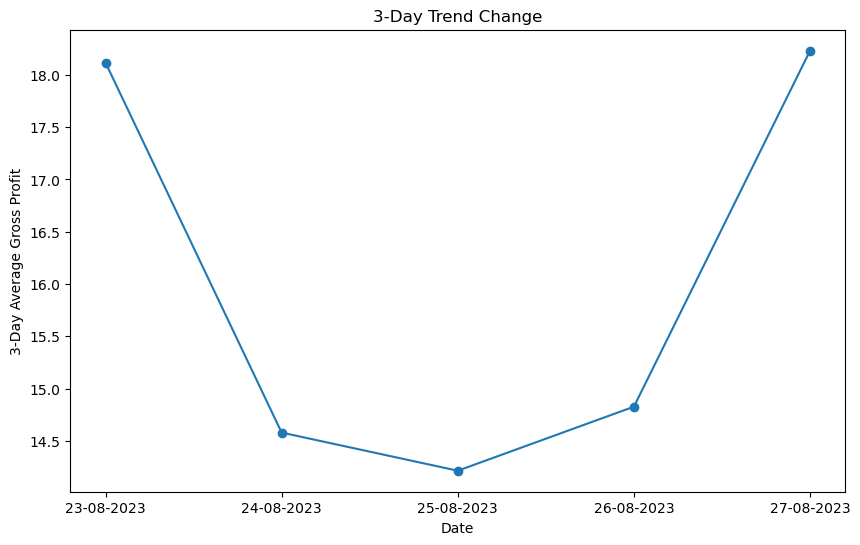

In [10]:
# We can create a line chart to visualize the 3-day trend changes over the time period
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_gross_profit, marker='o', linestyle='-')
plt.title('3-Day Trend Change')
#plt.title('3-Day Rolling Average Gross Profit Trend')

plt.xlabel('Date')
plt.ylabel('3-Day Average Gross Profit')
#plt.grid(True)

# Show the plot
plt.show()

### 8. Can you optimize the sales process to ensure gross margin is maximized?

In [11]:
#Vendors with negative gross profit and consider firing them
negative_profit_vendors = sales_data_2.groupby('Firm bought from')['gross_profit'].sum().loc[lambda x: x < 0].index.tolist()

#Customers with negative gross profit and consider letting them go
negative_profit_customers = sales_data_2.groupby('Customer')['gross_profit'].sum().loc[lambda x: x < 0].index.tolist()

print("Firing Vendor:", negative_profit_vendors)
print("Go of any Customer:", negative_profit_customers)


Firing Vendor: []
Go of any Customer: []


### 9. Calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

In [12]:
# Calculate percentiles for buying and selling prices

#Percentile for Buying price
buying_25th_percentile=np.percentile(sales_data_2['Buying price'],25)
buying_50th_percentile=np.percentile(sales_data_2['Buying price'],50)
buying_75th_percentile=np.percentile(sales_data_2['Buying price'],75)
print("Buying Percentiles\n")
print("25th Percentile:",buying_25th_percentile)
print("50th Percentile:",buying_50th_percentile)
print("75th Percentile:",buying_75th_percentile)

Buying Percentiles

25th Percentile: 29.9
50th Percentile: 60.76
75th Percentile: 78.32000000000001


In [13]:
#Percentile for Selling price
selling_25th_percentile=np.percentile(sales_data_2['Selling price'],25)
selling_50th_percentile=np.percentile(sales_data_2['Selling price'],50)
selling_75th_percentile=np.percentile(sales_data_2['Selling price'],75)
print("Selling Percentiles\n")
print("25th Percentile:",selling_25th_percentile)
print("50th Percentile:",selling_50th_percentile)
print("75th Percentile:",selling_75th_percentile)

Selling Percentiles

25th Percentile: 38.975
50th Percentile: 78.99000000000001
75th Percentile: 103.39750000000001


### 10. Analyze how often the Sapota's prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [14]:
# Check how often prices fall below 25th and above 75th percentile
below_25th_percentile = ((sales_data_2['Buying price'] < buying_25th_percentile) | (sales_data_2['Selling price'] < selling_25th_percentile)).sum()

above_75th_percentile = ((sales_data_2['Buying price'] > buying_75th_percentile) | (sales_data_2['Selling price'] > selling_75th_percentile)).sum()

total_transactions = len(sales_data_2)

# Calculating percentages
below_25th_percentile=(below_25th_percentile / total_transactions) * 100
above_75th_percentile=(above_75th_percentile / total_transactions) * 100

print(f"Transactions Percentage below the 25th percentile: {below_25th_percentile}%")
print(f"Transactions Percentage above the 75th percentile: {above_75th_percentile}%")

Transactions Percentage below the 25th percentile: 25.71428571428571%
Transactions Percentage above the 75th percentile: 30.0%


### 11. Bharath says that Vendor 4 has to be honored. What impact does it have on your optimal gross margin?

In [15]:
# Calculating gross margin without honoring vendor4
optimal_gross_margin_without_vendor4 = (sales_data_2[sales_data_2['Firm bought from'] != 'Vendor4']['Selling price'] - sales_data_2[sales_data_2['Firm bought from'] != 'Vendor4']['Buying price']).mean()

# Calculating gross margin when honoring vendor4
optimal_gross_margin_with_vendor4 = (sales_data_2[sales_data_2['Firm bought from'] == 'Vendor4']['Selling price'] - sales_data_2[sales_data_2['Firm bought from'] == 'Vendor4']['Buying price']).mean()

# Calculating impact on gross margin
impact_on_gross_margin = optimal_gross_margin_with_vendor4 - optimal_gross_margin_without_vendor4

# Print the results
print("Gross Margin without Vendor 4:", optimal_gross_margin_without_vendor4)
print("Gross Margin with Vendor 4:", optimal_gross_margin_with_vendor4)
print("Impact on Gross Margin by honoring Vendor 4:", impact_on_gross_margin)


Gross Margin without Vendor 4: 17.00147540983606
Gross Margin with Vendor 4: 18.901111111111106
Impact on Gross Margin by honoring Vendor 4: 1.899635701275045


### 12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin). What's the theoretical max margin the firm could have from that branch?

In [16]:
# Calculate the maximum gross margin by assuming the selling price that maximizes profit
sales_data_2['gross_margin'] = (sales_data_2['Selling price'] - sales_data_2['Buying price']) * sales_data_2['Quantity sold']

# Find the selling price that maximizes profit for each row
sales_data_2['optimal_selling_price'] = sales_data_2.apply(lambda row: row['Buying price'] if row['Buying price'] > row['Selling price'] else row['Selling price'], axis=1)

# Calculate total gross margin per vendor
vendor_gross_margin = sales_data_2.groupby('Firm bought from')['gross_margin'].sum()

# Find the vendor with the highest total gross margin
max_profit_vendor = vendor_gross_margin.idxmax()

# Calculate the maximum possible gross margin
max_possible_gross_margin = (sales_data_2['optimal_selling_price'] - sales_data_2['Buying price']) * sales_data_2['Quantity bought']

# Calculate the theoretical maximum gross margin
theoretical_max_gross_margin = max_possible_gross_margin.sum()

# Vendor with the highest total gross margin
print("Vendor for Strategic Tie-Up:", max_profit_vendor)

# Theoretical max gross margin
print("Theoretical Max Gross Margin (Considering Quantity Bought):", theoretical_max_gross_margin)

Vendor for Strategic Tie-Up: Vendor4
Theoretical Max Gross Margin (Considering Quantity Bought): 58630.99


### 13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)?

In [17]:
#Increase +1
price_change = 1

# Calculate the initial total quantity sold
initial_quantity_sold = sales_data_2['Quantity sold'].sum()

# Calculate the total quantity sold after increasing the price
sales_data_2['New Selling Price'] = sales_data_2['Selling price'] + price_change
new_quantity_sold = sales_data_2['New Selling Price'] * sales_data_2['Quantity sold']
new_total_quantity_sold = new_quantity_sold.sum()

# Calculate the percentage change in quantity sold
percentage_change_quantity_sold = ((new_total_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100

# Calculate the percentage change in price
percentage_change_price = (price_change / sales_data_2['Selling price'].mean()) * 100

# Calculate price elasticity
i_elasticity = percentage_change_quantity_sold / percentage_change_price

In [18]:
#Decrease -1

# Calculate the total quantity sold after increasing the price
sales_data_2['New Selling Price'] = sales_data_2['Selling price'] - price_change
new_quantity_sold = sales_data_2['New Selling Price'] * sales_data_2['Quantity sold']
new_total_quantity_sold = new_quantity_sold.sum()

# Calculate the percentage change in quantity sold
percentage_change_quantity_sold = ((new_total_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100

# Calculate the percentage change in price
percentage_change_price = (price_change / sales_data_2['Selling price'].mean()) * 100

# Calculate price elasticity
d_elasticity = percentage_change_quantity_sold / percentage_change_price

In [19]:
Total_change = (i_elasticity - d_elasticity)
print("Change in price of Sapota for that Branch Increasing by 1: {:.2f}".format(i_elasticity))
print("Change in price of Sapota for that Branch Decreasing by 1: {:.2f}".format(d_elasticity))
print("Total Price Elasticity for that branch:",Total_change)

Change in price of Sapota for that Branch Increasing by 1: 5566.55
Change in price of Sapota for that Branch Decreasing by 1: 5418.72
Total Price Elasticity for that branch: 147.8265714285717
